# Instance and Inductive Models

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set_context('notebook')
sns.set_style('whitegrid')

## Classification Metrics I

![Classification Metrics](figures/classification_metrics.png)

### Binary Classification


How well did predicted values match actual labeled values?

In a 2-class problem, there are two ways to be “right”:
 - Classifier correctly identifies cases (aka “True Positives”)
 - Classifier correctly identifies non-cases (aka “True Negatives”)

...and two ways to be “wrong”:
 - Classifier incorrectly identifies a non-case as a case (aka “False Positive” or “Type I Error”)
 - Classifier incorrectly identifies a case as a non-case (aka “False Negative” or “Type II Error”)

### Multi-Class Classification


 - How correct were predictions on a per-class basis? How correct overall?

 - Are certain classes harder to predict?

 - Do we care more about accurately predicting some classes than others?

### Precision and Recall



```
precision = true positives / (true positives + false positives)

recall = true positives / (false negatives + true positives)
```

![Precision and Recall](figures/precision_recall.png)

### F1 and Accuracy



```
accuracy = true positives + true negatives / total

F1 score = 2 * ((precision * recall) / (precision + recall))
```

### ROC-AUC Curves

A ROCAUC (Receiver Operating Characteristic/Area Under the Curve) allows the user to weigh the tradeoff between the classifier’s sensitivity and specificity.

The Receiver Operating Characteristic (ROC) is a measure of a classifier’s predictive quality that compares and visualizes the tradeoff between the model’s sensitivity and specificity. When plotted, a ROC curve displays the true positive rate on the Y axis and the false positive rate on the X axis on both a global average and per-class basis. The ideal point is therefore the top-left corner of the plot: false positives are zero and true positives are one.

This leads to another metric, area under the curve (AUC), which is a computation of the relationship between false positives and true positives. The higher the AUC, the better the model generally is. However, it is also important to inspect the “steepness” of the curve, as this describes the maximization of the true positive rate while minimizing the false positive rate.


```python
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y,yhat)
roc_auc = auc(fpr, tpr)```


Visualize tradeoff between classifier's sensitivity (how well it finds true positives) and specificity (how well it avoids false positives)
 - straight horizontal line -> perfect classifier
 - pulling a lot toward the upper left corner -> good accuracy
 - exactly aligned with the diagonal -> coin toss


In [2]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/occupancy/occupancy.csv')


# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ["unoccupied", "occupied"]

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


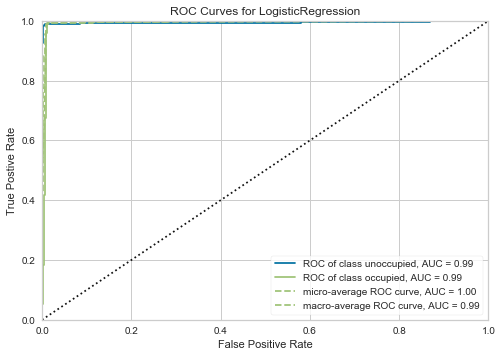

In [3]:
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(LogisticRegression(), classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

ROC curves are typically used in binary classification, and in fact the Scikit-Learn `roc_curve` metric is only able to perform metrics for binary classifiers. 

Yellowbrick’s `ROCAUC` Visualizer does allow for plotting multiclass classification curves by binarizing the output (per-class) or to use one-vs-rest (micro score) or one-vs-all (macro score) strategies of classification.


(_note: not in master yet, but here's a preview_)

In [4]:
# Load multi-class classification dataset
game = pd.read_csv('data/game/game.csv')

classes = ["win", "loss", "draw"]

# Encode the non-numeric columns
game.replace({'loss':-1, 'draw':0, 'win':1, 'x':2, 'o':3, 'b':4}, inplace=True)

# Extract the numpy arrays from the data frame
X = game.iloc[:, game.columns != 'outcome']
y = game['outcome']

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

```python
from sklearn.linear_model import RidgeClassifier

visualizer = ROCAUC(RidgeClassifier(), classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data
```

![Multi-class ROCAUC](figures/multi_class_rocauc.png)

### Confusion Matrix


```python
from sklearn.metrics import confusion_matrix
```

 - takes as an argument actual values and predicted values generated by the fitted model
 - outputs a confusion matrix

![Confusion Matrix](figures/confusion_matrix.png)

The ConfusionMatrix visualizer is a ScoreVisualizer that takes a fitted scikit-learn classifier and a set of test X and y values and returns a report showing how each of the test values predicted classes compare to their actual classes. Data scientists use confusion matrices to understand which classes are most easily confused. These provide similar information as what is available in a ClassificationReport, but rather than top-level scores, they provide deeper insight into the classification of individual data points.

In [5]:
from sklearn.model_selection import train_test_split


game = pd.read_csv('data/game/game.csv')

game.replace({'loss':-1, 'draw':0, 'win':1, 'x':2, 'o':3, 'b':4}, inplace=True)

X = game.iloc[:, game.columns != 'outcome']
y = game['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

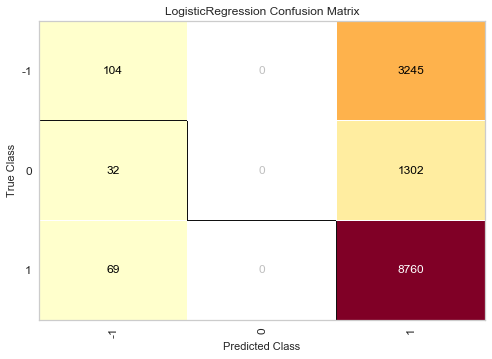

In [6]:
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix


model = LogisticRegression()

cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

### Classification Report

The classification report visualizer displays the precision, recall, F1, and support scores for the model. In order to support easier interpretation and problem detection, the report integrates numerical scores with a color-coded heatmap. All heatmaps are in the range `(0.0, 1.0)` to facilitate easy comparison of classification models across different classification reports.



```python
from sklearn.metrics import classification_report as cr

print(cr(y, yhat, target_names=target_names))
```


 - includes same basic info as confusion matrix
 - 3 different evaluation metrics: precision, recall, F1 score
 - includes class labels for interpretability


In [7]:
data = pd.read_csv('data/occupancy/occupancy.csv')


# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ["unoccupied", "occupied"]

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


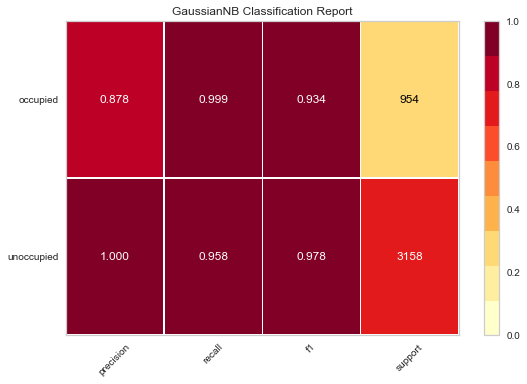

In [8]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport


bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes, support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  
g = visualizer.poof() 

## Nearest Neighbors

### Unsupervised Nearest Neighbors

### kNN Classification and Regression

## Decision Trees

## Decision Stumps

## Random Forest

## Boosting

### Gradient Boosting

### AdaBoost

## Ensembles